In [1]:
"""visualiser"""
%load_ext autoreload
%autoreload 1
%aimport visualiser
#import visualiser
import pathlib
import pandas as pd
import matplotlib
import numpy as np

# interactive tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False, connected=True)

In [11]:
root_dir = pathlib.Path("/home/hello/data/škola/FIT/dp/repo-aes/scripts/logs_local/")
dirs = list(root_dir.glob("*/"))# + list(root_dir.glob("monomelim_parallel_*")) + list(root_dir.glob("ref_parallel_*"))
vis = visualiser.Visualiser(batch_directories=dirs)
df = vis.df
#vis.plot(metric="time/all", aes_tup=(3,2,2,4), is_preprocessing=True)

104 invalid JSON files
139 key errors
loaded 2949 files


In [12]:
""" Display overview """
#show(df, maxBytes=0, buttons=["columnsToggle"],)
#valid_df = df
valid_df = df[~df["crash"] & df["key_contained"]]
show(valid_df.drop(columns=["crash", "crash_reason", "key_contained"]), maxBytes=0, buttons=["columnsToggle"],)

In [13]:
""" Display concrete cipher """
aes_tup = "2424"
n,r,c,e = tuple(map(int, aes_tup))#(3,2,2,4)
#show(valid_df[(valid_df["n"]==n) & (valid_df["r"]==r) & (valid_df["c"]==c) & (valid_df["e"]==e)].drop(columns=["crash", "crash_reason", "key_contained", "data/hilbert-series"]), maxBytes=0, buttons=["columnsToggle"],)
group = valid_df[(valid_df["n"]==n) & (valid_df["r"]==r) & (valid_df["c"]==c) & (valid_df["e"]==e)].drop(columns=["crash", "crash_reason", "key_contained", "data/hilbert-series"])
show(group,maxBytes=0, buttons=["columnsToggle"],)
#.groupby(["rdim","pc", "preprocessing"], dropna=False)
#for cols, g in group: 
#    rdim,pc,pre = cols
#    #if isinstance(pre, str) or not np.isnan(pre):
#    #    continue
#    print(cols)
#    show(g, maxBytes=0, buttons=["columnsToggle"],)

In [12]:
""" Show crash logs """
aes_tup = "2424"
n,r,c,e = tuple(map(int, aes_tup))#(3,2,2,4)
show(df[(df["n"]==n) & (df["r"]==r) & (df["c"]==c) & (df["e"]==e)], maxBytes=0, buttons=["columnsToggle"],)

In [5]:
for aes_tup, params in valid_df[valid_df["preprocessing"].isnull()].sort_values(by=["pc", "rdim"]).groupby(["n", "r", "c", "e"]):
    print(aes_tup)
    show(params[["pc", "rdim", "preprocessing", "time/all", "time/generate_aes", "time/preprocess", "time/gb", "data/dim-variety", "data/memory-mb", "data/semireg", "data/weight-lll", "data/eliminated-monoms", "data/highest-gb-compute-deg"]])

(1, 2, 2, 4)


(1, 2, 4, 4)


(1, 2, 4, 8)


(1, 4, 2, 4)


(1, 4, 2, 8)


(1, 4, 4, 4)


(1, 4, 4, 8)


(2, 2, 2, 4)


(2, 2, 4, 4)


(3, 2, 2, 4)


(10, 2, 2, 4)


In [5]:
import matplotlib.pyplot as plt
time_cols = [col for col in vis.df.columns  if col.startswith("time/")]
groups = vis.df.groupby(["n", "r", "c", "e"])
for aes_tup, params in groups:
    if aes_tup != (3,2,2,4):
        continue
    print(aes_tup)
    for rd, data in params.loc[~params["rdim"].isnull()].sort_values(by="rdim", ascending=True).astype({'rdim': 'int32'}).groupby("rdim",dropna=True):
        print("RD",rd)
        #print(len(data.index))
        valid_data = data.loc[~data["crash"] & data["key_contained"]]
        if valid_data.empty:
            continue
        #print(
        display(valid_data.sort_values(by="pc", ascending=True).set_index("pc")[time_cols])
#            .plot.bar(title=f"{aes_tup}, rdim={rd}")
    break
plt.close()

(3, 2, 2, 4)
RD 1


,time/all,time/gb,time/preprocess,time/generate_aes
pc,,,,
1,50.632909,38.800580,1.575324,7.616009
1,51.323509,39.671779,1.581420,7.437926
2,51.796938,38.579030,2.232554,7.985402
2,53.506776,39.424885,2.245484,8.803080
4,53.145740,35.769990,4.038342,9.891612
4,55.966022,37.438497,4.093874,10.489823
8,57.666381,32.801960,7.424248,12.941440
32,140.351300,35.592600,41.996499,40.424682
64,299.441718,30.685378,120.009964,73.915582


RD 2


,time/all,time/gb,time/preprocess,time/generate_aes
pc,,,,
2,55.100853,40.287625,2.722891,8.599834
2,57.525770,43.049348,2.822513,8.075801
4,64.613862,46.176883,4.503476,9.953985
8,67.589532,41.595372,8.024524,12.978521
8,69.212207,43.442031,8.058625,12.830965
16,90.210504,45.689150,15.977152,20.994566
16,81.883431,36.813303,15.954480,21.492725
32,145.772273,40.468200,42.666169,39.984354
32,149.086530,43.359984,42.409484,40.517329


RD 4


,time/all,time/gb,time/preprocess,time/generate_aes
pc,,,,
4,60.017572,38.924072,5.841819,10.064700
4,1818.243909,1797.035376,5.867379,10.104521
8,70.382288,41.670569,9.251427,13.416019
8,67.912292,39.286015,9.377476,13.108466
16,87.507319,40.318005,17.229935,21.021195
16,1945.434234,1781.716789,16.977342,21.287307
32,1526.170307,1418.257217,43.515812,40.052000
32,1976.290466,1868.798380,44.153976,39.367762
64,325.490736,50.325710,119.806435,76.408801


RD 8


,time/all,time/gb,time/preprocess,time/generate_aes
pc,,,,
8,65.569029,31.828533,11.452539,13.563701
8,64.848428,31.617305,11.141998,13.455723
16,536.103432,38.676508,19.210101,21.297265
16,85.578553,33.338670,19.587622,21.043626
32,142.969721,32.345762,46.204621,37.795783
32,634.776886,514.724384,46.959844,39.852056
64,333.685394,54.213520,124.451309,75.590988
64,305.299447,30.280817,124.529357,73.127774


RD 16


,time/all,time/gb,time/preprocess,time/generate_aes
pc,,,,
16,98.719705,36.138711,23.604448,21.515602
16,358.954722,57.746464,25.219918,21.331617
32,160.407436,36.438510,51.628947,39.524750
32,5494.345524,3689.231817,50.720074,40.440316
64,3402.895001,3116.554747,128.957966,73.734919
64,329.751607,38.820204,130.875515,74.391690


RD 32


,time/all,time/gb,time/preprocess,time/generate_aes
pc,,,,
32,214.381382,46.987623,62.248578,39.799014
32,206.168532,48.371723,62.961215,39.904057
64,366.297896,46.081063,142.611605,75.392040
64,354.387269,39.133933,141.647070,73.259426


(1, 2, 2, 4)
(1, 2, 4, 4)
(1, 2, 4, 8)
(1, 4, 2, 4)
(1, 4, 2, 8)
(1, 4, 4, 4)
(1, 4, 4, 8)
(2, 2, 2, 4)
(2, 2, 4, 4)
(2, 4, 2, 4)
(3, 2, 2, 4)
(10, 2, 2, 4)


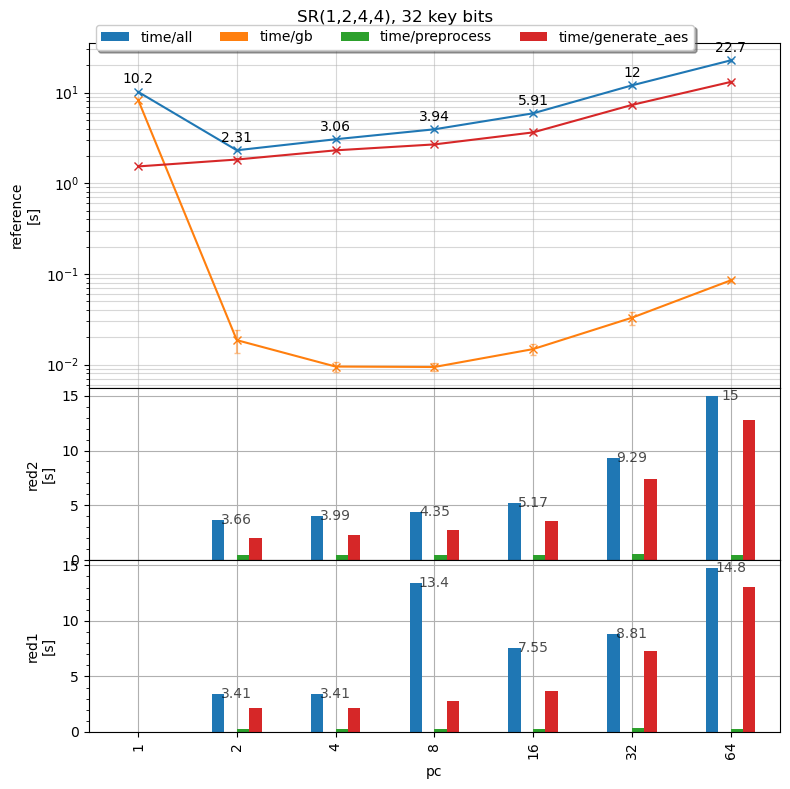

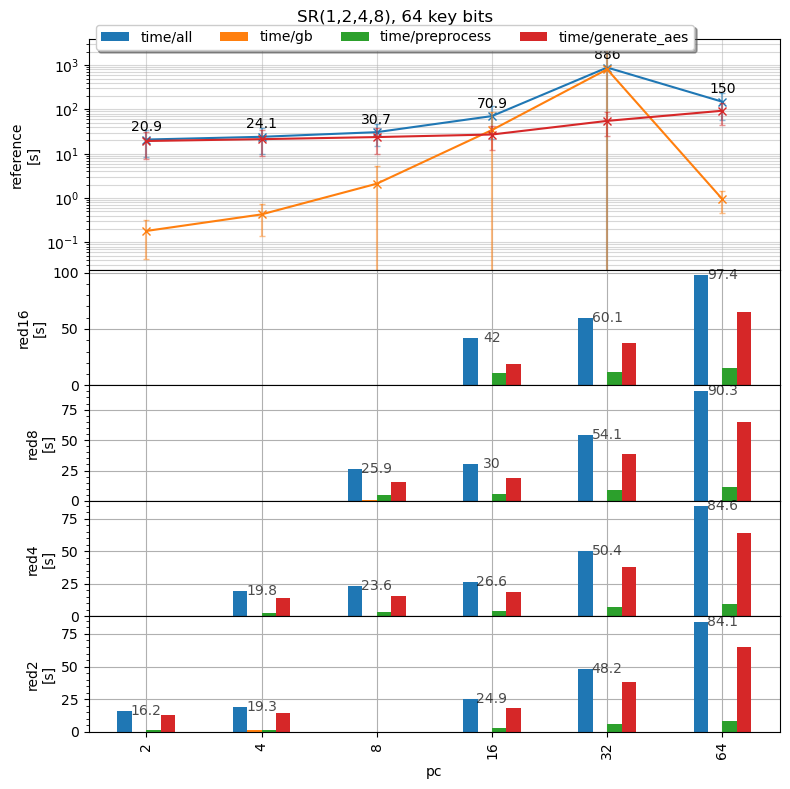

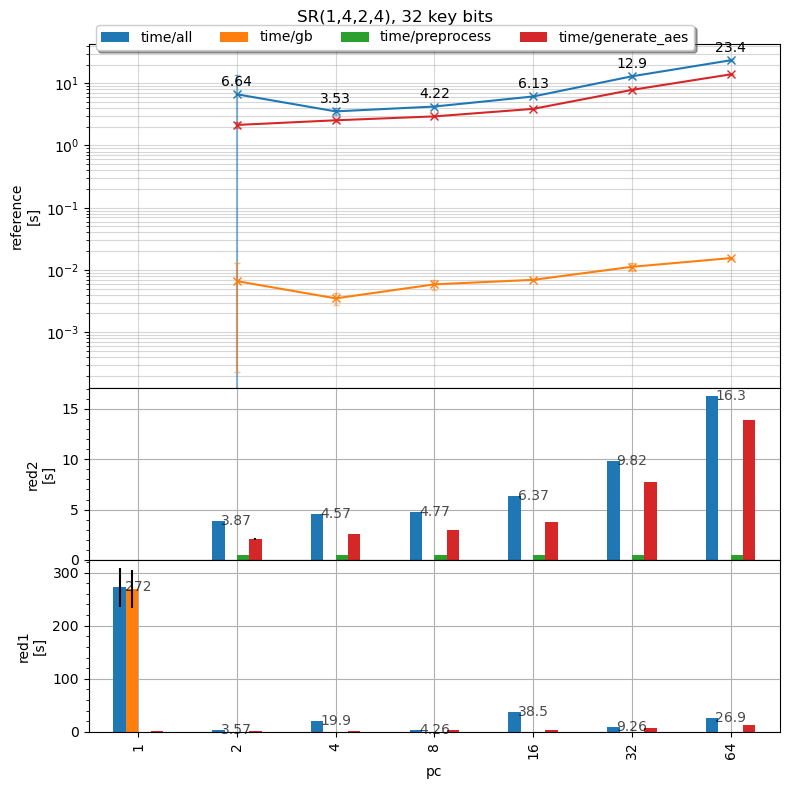

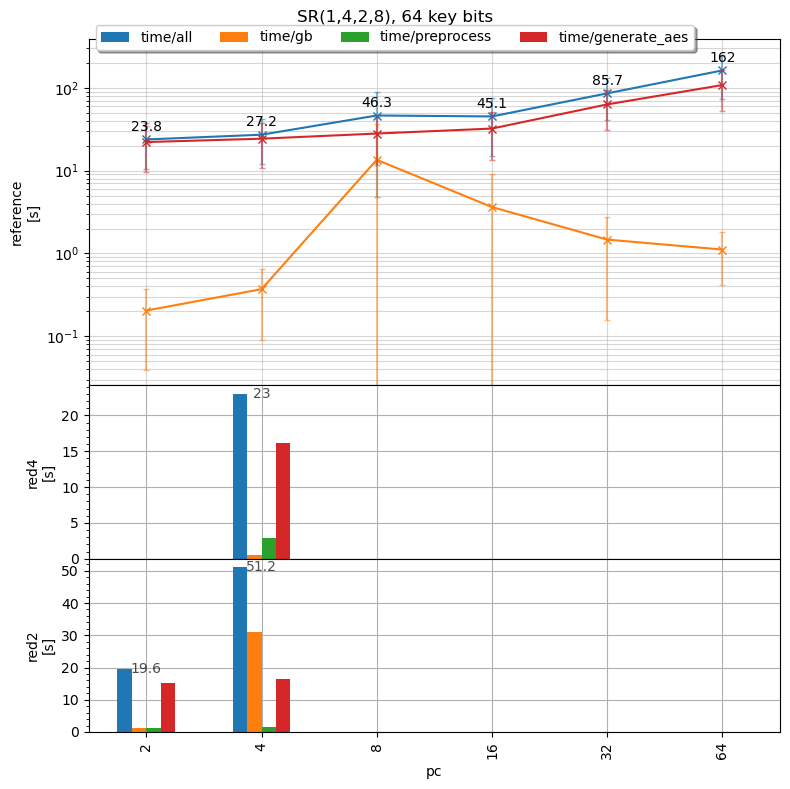

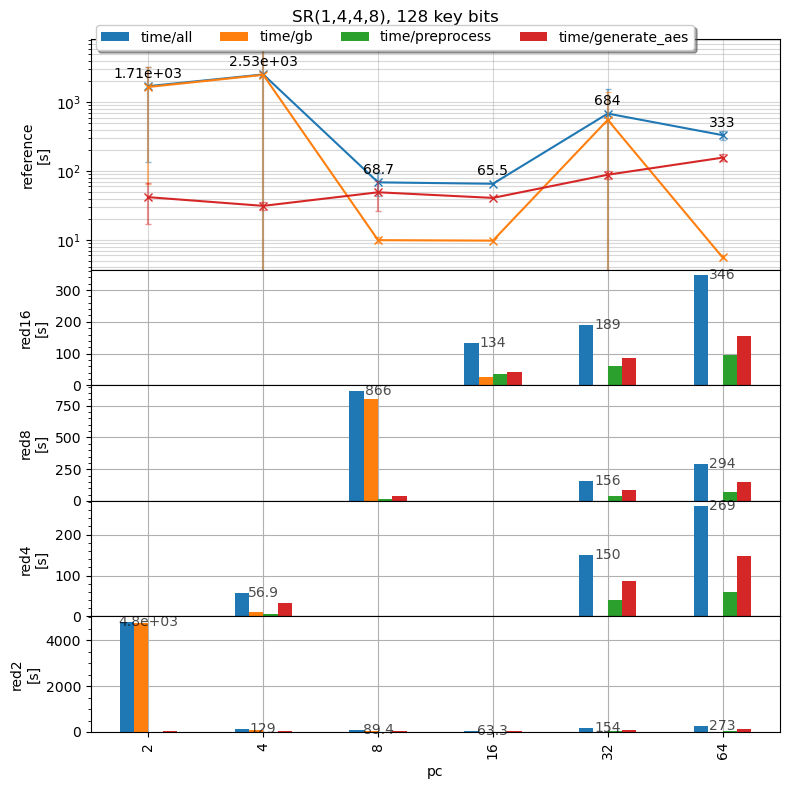

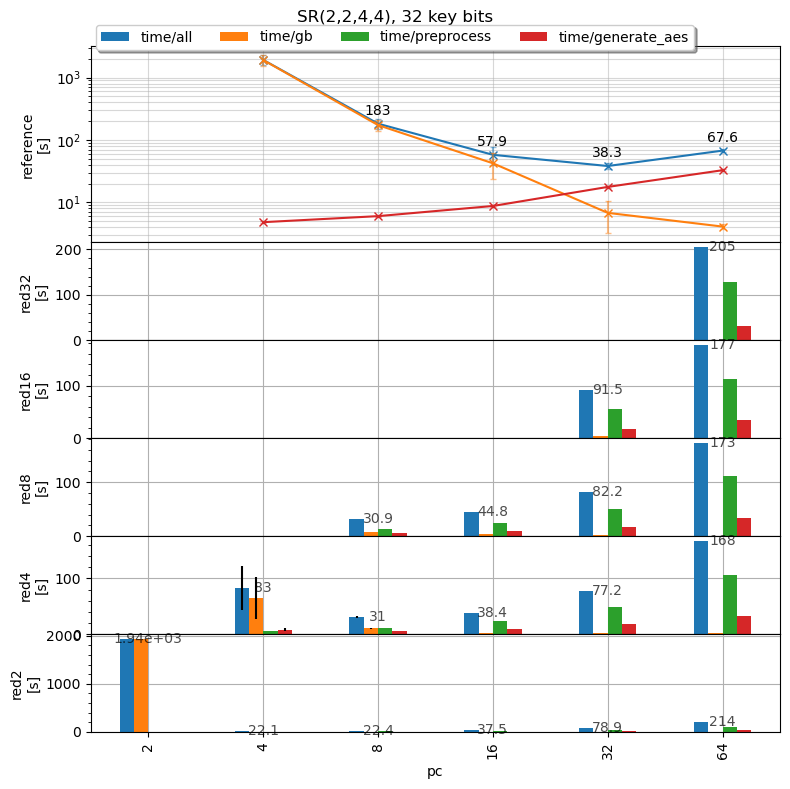

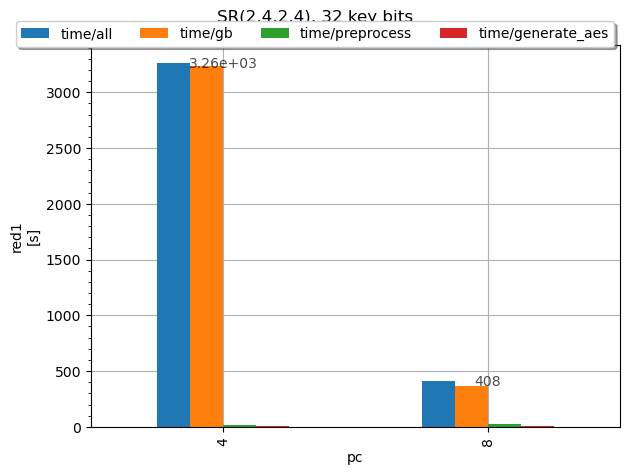

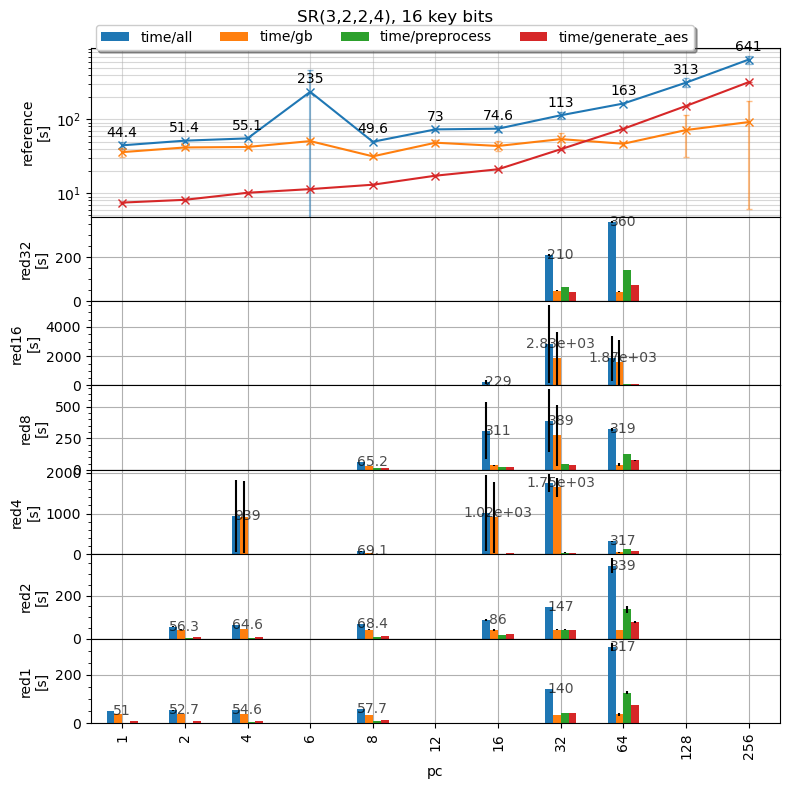

In [6]:
df = df[(~df["crash"]) & (df["key_contained"])]
aes_types = df.groupby(["n", "r", "c", "e"])
metrics = [col for col in vis.df.columns  if col.startswith("time/")]
#metrics_ref = ["time/]
for aes_tup, params in aes_types:
    n,r,c,e = aes_tup
    #if aes_tup != (3, 2, 2, 4):
    #    continue
    print(aes_tup)
    use_ref = params["rdim"].isnull().values.any()
    
    data_rdim = params.sort_values(by="rdim", ascending=True)
    rdims = sorted(list(data_rdim["rdim"].value_counts().keys()))
    pcs = sorted(list(data_rdim["pc"].value_counts().keys()))
    data_rdim = data_rdim.loc[~(params["rdim"].isnull())].astype({'rdim': 'int32'})
    if len(rdims) == 0 or len(pcs)==0:
        continue

    if not use_ref:
        fig, axs = plt.subplots(
            nrows=len(rdims), sharex=True,
            gridspec_kw=dict(
                height_ratios=[*[1 for _ in rdims]], hspace=0
            ),
        )
        ax_ref = None
    else:
        fig, (ax_ref, *axs) = plt.subplots(
            figsize=(8,8),
            nrows=len(rdims) + 1,
            sharex=True,
            # figsize=(6, 2),
            gridspec_kw=dict(
                height_ratios=[2, *[1 for _ in rdims]], hspace=0
            ),
        )
        ref_metrics = params.loc[params["preprocessing"].isnull()].sort_values(by="pc").set_index("pc")[metrics].groupby("pc")
        means = ref_metrics.mean()
        stds = ref_metrics.std()
        for im, metric in enumerate(metrics):
            pc_indices = list(map(pcs.index, means[metric].index))
            ax_ref.plot(pc_indices, means[metric].values, marker="x", color=f"C{im}")
            ax_ref.errorbar(pc_indices, means[metric].values, fmt=",", yerr=stds[metric].values, alpha=.5, capsize=2, color=f"C{im}")
            
        for pc_annot, val_annot in dict(means.max(axis=1)).items():
            ipc = pcs.index(pc_annot)
            ax_ref.annotate(f"{val_annot:.3g}", (ipc, val_annot),
                    ha='center', va='bottom',zorder=10,
                    xytext=(0, 4), textcoords='offset points')
            
        ax_ref.set_yscale('log')#, nonposy='clip')
        ax_ref.set_ylabel('reference\n[s]')
        #ax_ref.set_ylim(0)
        #ax_ref.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
        ax_ref.yaxis.grid(True, which='both', alpha=.5)
        ax_ref.xaxis.grid(True, which='major', alpha=.5)
        ax_ref.set_axisbelow(True)
        #means.plot(yerr=stds, style=["o"]*4, ax=ax_ref) # for some reason cannot change style plot
        #ax_ref.get_legend().remove()
    if len(rdims) == 1:
        axs = [axs]
        
    for rdim, data in data_rdim.groupby("rdim",dropna=True):
        i = rdims.index(rdim)
        ax = axs[len(rdims) - i - 1]
        
        #print("RD",rdim, i)
        if valid_data.empty:
            continue
        data_metrics = data.sort_values(by="pc", ascending=True).set_index("pc")[metrics]
        # fill in missing pcs to align subplots
        pcs_missing = set(pcs).difference(set(data_metrics.index))
        if len(pcs_missing) > 0:
            data_metrics = pd.concat(
                [data_metrics, pd.DataFrame(
                    [{"pc": pc_miss} for pc_miss in pcs_missing]).set_index("pc")
                ]
            ).sort_values(by="pc") # ignore_index=True
        data_metrics = data_metrics.sort_values(by="pc").groupby("pc")
        means = data_metrics.mean()
        stds = data_metrics.std(ddof=0)
        means.plot.bar(yerr=stds, ax=ax, sharex=True,  ylim=0)#,  ax=axs[i]),#title=f"{aes_tup}, rdim={rd}",)
        # annotate
        for pc_annot, val_annot in dict(means.max(axis=1)).items():
            ipc = pcs.index(pc_annot)
            ax.annotate(f"{val_annot:.3g}", (ipc, val_annot),
                    ha='center', va='center',zorder=10,alpha=.7
                    #xytext=(0, -2), textcoords='offset points'
                       )
        
        ax.set_ylabel(f"red{rdim}\n[s]")
        #ax.yaxis.grid(True, which='both')
        #ax.yaxis.grid(True, which='minor')
        ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
        ax.yaxis.grid(True, which='major')
        ax.xaxis.grid(True, which='major')
        ax.set_axisbelow(True)
        
    handles, labels = axs[-1].get_legend_handles_labels()
    for ax in axs:
        ax.get_legend().remove()
        
    fig.legend(handles, labels, loc='upper center', ncols=4, bbox_to_anchor=[.5, 0.97], shadow=True)
    fig.suptitle(f"SR({n},{r},{c},{e}), {r*c*e} key bits")
    fig.subplots_adjust(hspace=0)
    fig.tight_layout()
    #fig.show()
#valid_data.sort_values(by="pc", ascending=True).set_index("pc")[time_cols].mean().plot.bar(title=f"{aes_tup}, rdim={rd}")

In [7]:
print(container.patches)

NameError: name 'container' is not defined